# ---------------------------------
# Suicide Analysis (1985-2016)
# ---------------------------------

## 0. Load data
## 1. Data cleaning
## 2. Global trends
        2.1. Suicides by counbtry
        2.2. Suicides by year
        2.3. Suicides by sex
        2.4. Suicides by age
## 3. Spanish case
        3.1. Suicides per 100k and its relation to the GDP
        3.2. Suicides per 100k and its relation to age and sex

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
colors = ["amber", "windows blue", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

In [2]:
sns.set_context("notebook", 1.5)
alpha = 0.7

# 0. Load data 

In [3]:
df0 = pd.read_csv('master.csv')

In [4]:
df0.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
# Number unique countries
df0['country'].nunique()

101

In [7]:
#Change columns names
df0.rename(columns={'suicides_no':'suicides', 'suicides/100k pop':'suicides/100k',\
                   ' gdp_for_year ($) ':'gdp/year ', 'gdp_per_capita ($)':'gdp/capita'}, inplace=True)

In [8]:
df0.head()

country  year     sex          age  suicides  population  suicides/100k  \
0  Albania  1987    male  15-24 years        21      312900           6.71   
1  Albania  1987    male  35-54 years        16      308000           5.19   
2  Albania  1987  female  15-24 years        14      289700           4.83   
3  Albania  1987    male    75+ years         1       21800           4.59   
4  Albania  1987    male  25-34 years         9      274300           3.28   

  country-year  HDI for year      gdp/year   gdp/capita       generation  
0  Albania1987           NaN  2,156,624,900         796     Generation X  
1  Albania1987           NaN  2,156,624,900         796           Silent  
2  Albania1987           NaN  2,156,624,900         796     Generation X  
3  Albania1987           NaN  2,156,624,900         796  G.I. Generation  
4  Albania1987           NaN  2,156,624,900         796          Boomers

# 1. Data cleaning

## 1.1. Data by sex, age and generation

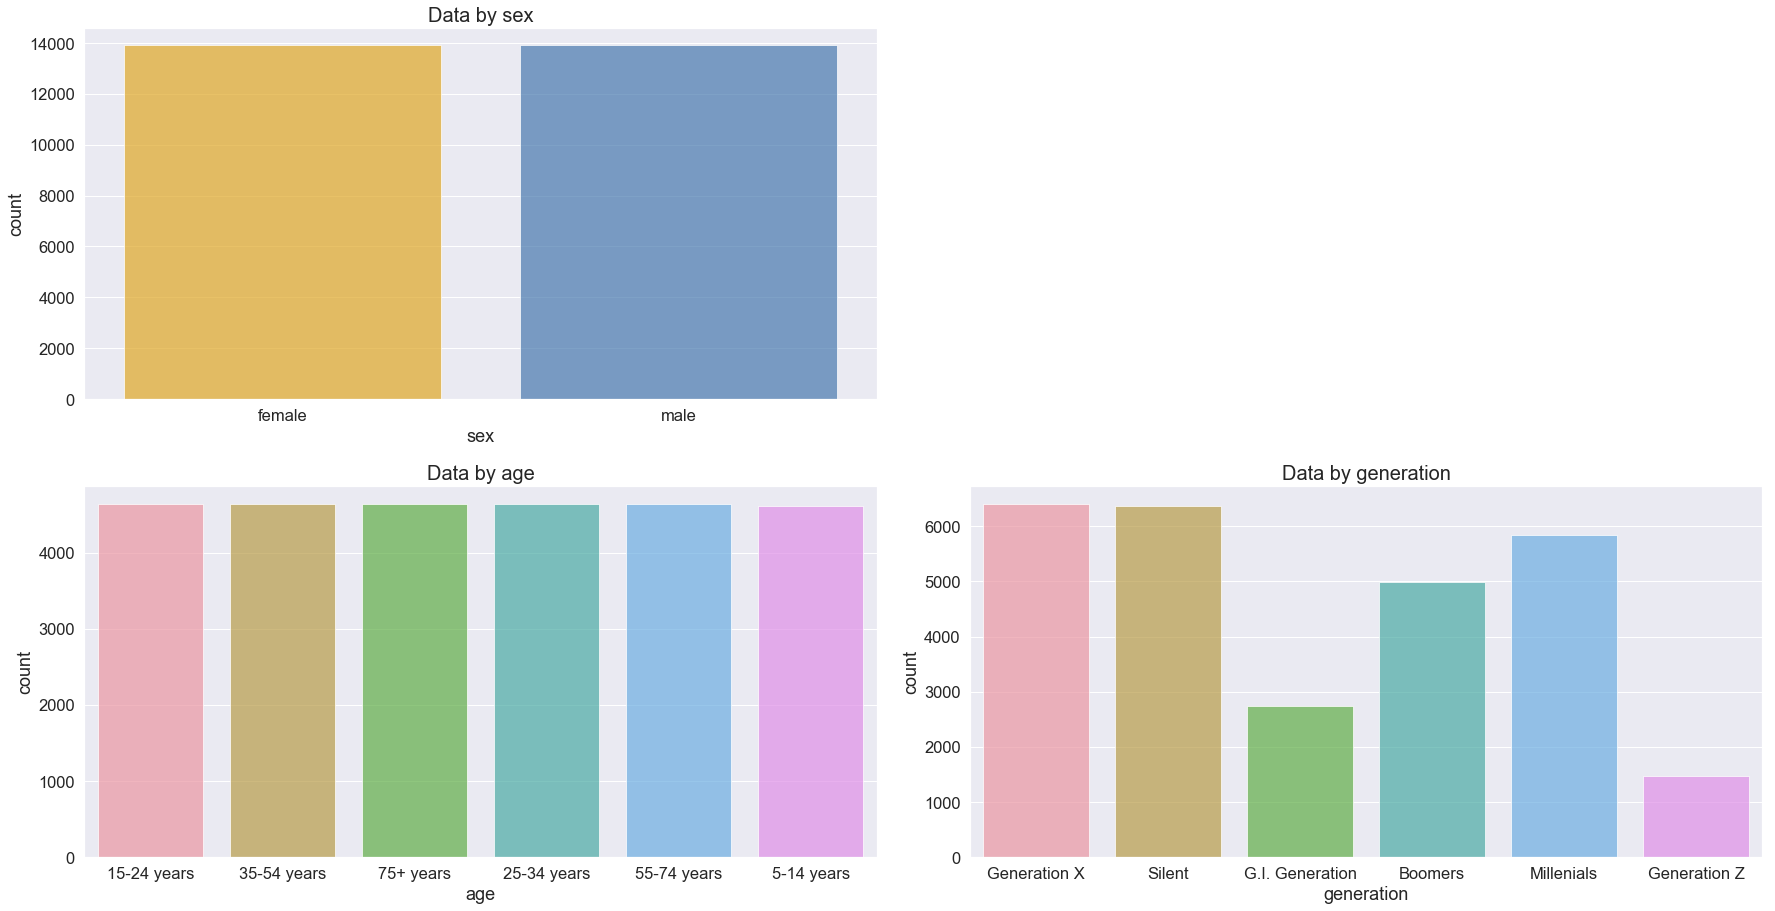

In [9]:
plt.figure(figsize=(25,13))
# By sex
plt.subplot(221)
sns.countplot(x='sex', data=df0, alpha=alpha, order=['female','male'])
plt.title('Data by sex', fontsize=20)
# By age
plt.subplot(223)
sns.countplot(x='age', data=df0, alpha=alpha)
plt.title('Data by age', fontsize=20)
# By generation
plt.subplot(224)
sns.countplot(x='generation', data=df0, alpha=alpha)
plt.title('Data by generation', fontsize=20)

plt.tight_layout()
plt.show()

The amount of data by age and by sex is the same; not by generation. 

## 1.2. Data by country

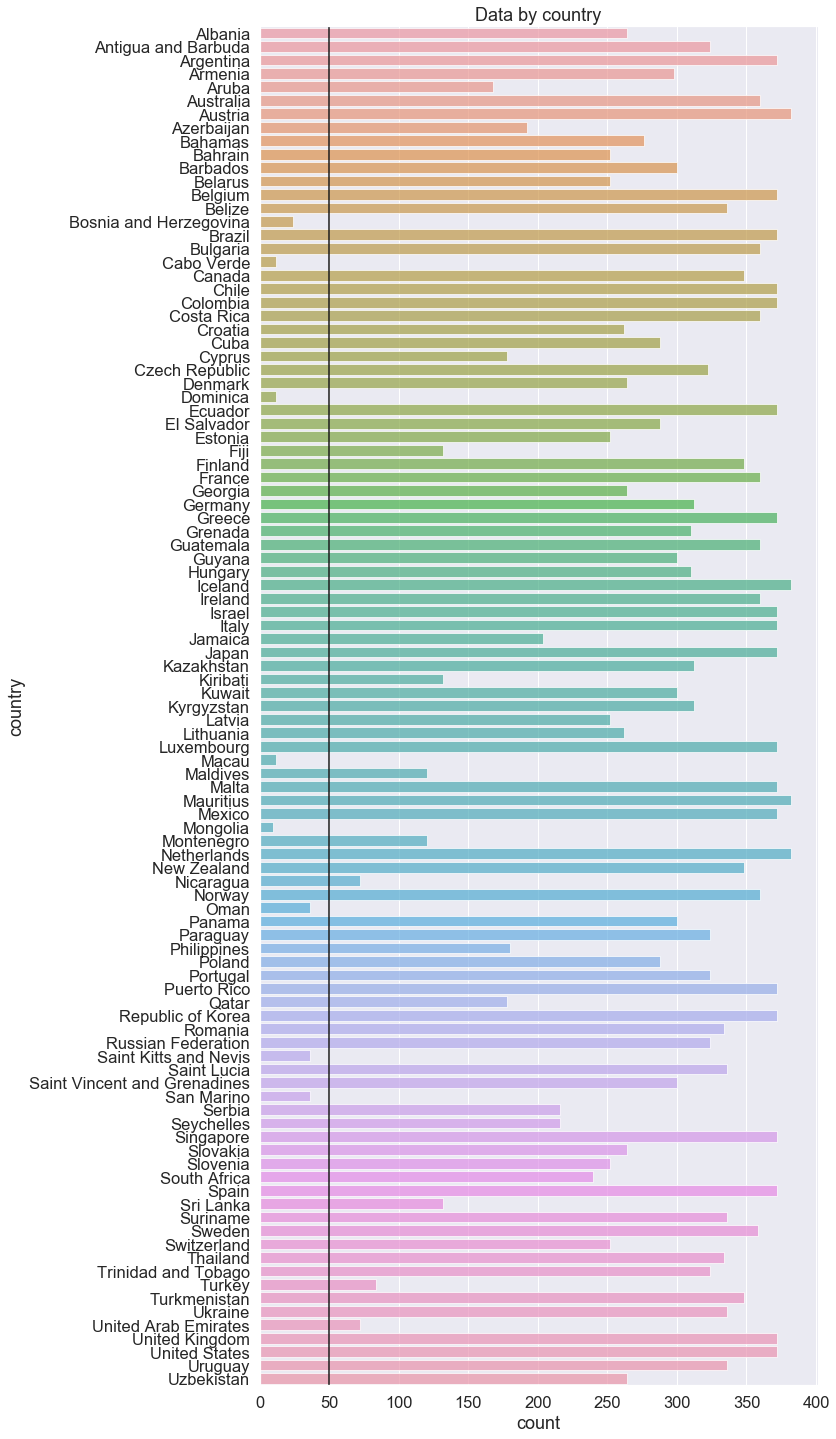

In [10]:
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=df0, alpha=alpha)
plt.title('Data by country')
plt.axvline(x=50, color='k')
plt.show()

I delete the countries which amount of data is below the black line.

In [11]:
country_amountData = df0.groupby('country').count()['year'].reset_index()
country_amountData.sort_values(by='year', ascending=True). head(10)

country  year
59                Mongolia    10
27                Dominica    12
54                   Macau    12
17              Cabo Verde    12
14  Bosnia and Herzegovina    24
65                    Oman    36
76   Saint Kitts and Nevis    36
79              San Marino    36
96    United Arab Emirates    72
63               Nicaragua    72

From the last dataset we figure out that the data of __8 countries will be deleted__ (they have less than 50 amount of data).

In [12]:
country_selectList = country_amountData[country_amountData['year'] > 50]['country'].reset_index()

In [13]:
df1 = pd.merge(df0, country_selectList, how='outer', indicator=True)
df1 = df1[df1['_merge']=='both']
df1.nunique()

country             93
year                32
sex                  2
age                  6
suicides          2084
population       25440
suicides/100k     5294
country-year      2306
HDI for year       305
gdp/year          2306
gdp/capita        2219
generation           6
index               93
_merge               1
dtype: int64

Therefore, __we have 93 countries from the original 101 to be considered in our analysis__. Now we move to the amount of data per year, which is plotted in the following figure.  Again, we will delete the year which its data is below the black line. In this case only 2016. 

## 1.3. Data by year

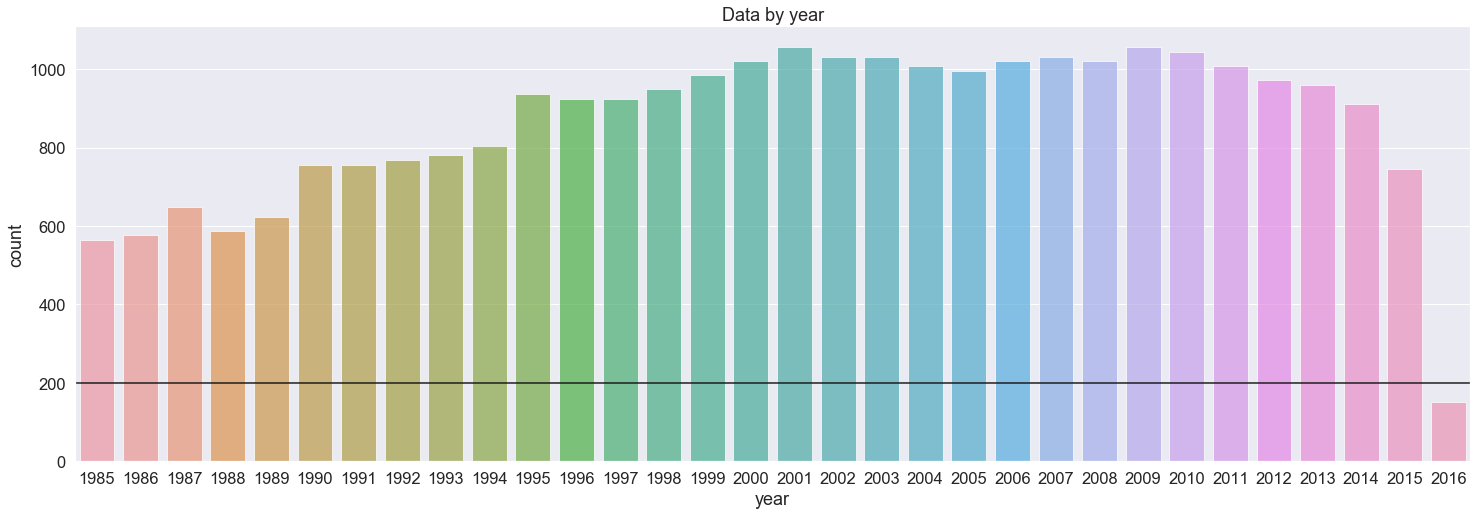

In [14]:
plt.figure(figsize=(25,8))
sns.countplot(x='year', data=df1, alpha=alpha)
plt.title('Data by year')
plt.axhline(y=200, color='k')
plt.show()

In [15]:
df2 = df1[df1['year'] != 2016]

## 1.4. Missing data

We plot the Nan's of the dataset.

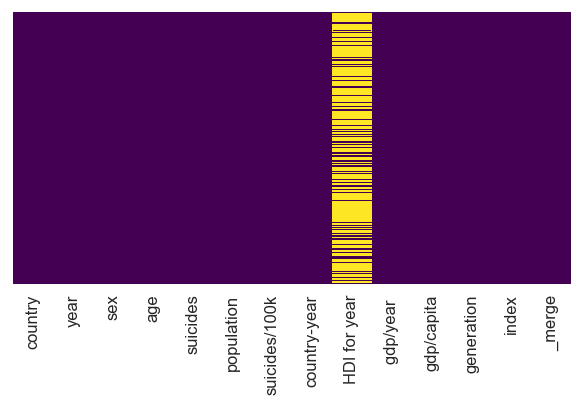

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In the HDI for year column there are too many missing values. We can not figure out these values from the available data. 

In [17]:
number_NAN = len(df2) - df2['HDI for year'].count()
number_noNAN = len(df2)
number_NAN * 100 / number_noNAN

69.75120034919249

The __69% of the values__ in that columns are __Nan's__. Therefore, we delete this column and then we rename the dataframe. 

In [18]:
df = df2.drop('HDI for year', axis=1)
df.head()

country  year     sex          age  suicides  population  suicides/100k  \
0  Albania  1987    male  15-24 years        21      312900           6.71   
1  Albania  1987    male  35-54 years        16      308000           5.19   
2  Albania  1987  female  15-24 years        14      289700           4.83   
3  Albania  1987    male    75+ years         1       21800           4.59   
4  Albania  1987    male  25-34 years         9      274300           3.28   

  country-year      gdp/year   gdp/capita       generation  index _merge  
0  Albania1987  2,156,624,900         796     Generation X    0.0   both  
1  Albania1987  2,156,624,900         796           Silent    0.0   both  
2  Albania1987  2,156,624,900         796     Generation X    0.0   both  
3  Albania1987  2,156,624,900         796  G.I. Generation    0.0   both  
4  Albania1987  2,156,624,900         796          Boomers    0.0   both

We can delete the columns we do not need: country-year, index and _merge

In [19]:
df.drop(['country-year', 'index', '_merge'], axis=1, inplace=True)

Finally we check that we have no missing values in the dataset we will analyze

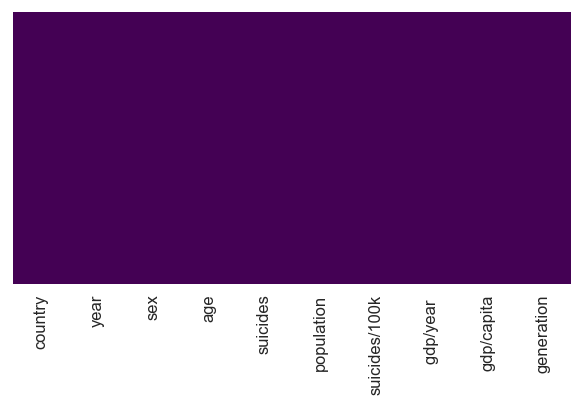

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### Conclusions
1. We have deleted the years and countries which amount of data was almost negligible. 
2. The column HDI for year does not give us information because there is a 69% of nan's values. We have deleted this column.
3. The amount of data by age and sex is equilibrate, not for generation, country and year.

# 2. Global trends

## 2.1. Suicides by country

I create a dataframe by country. The columns are the mean of each variable. The red line in the plot gives us the mean over all countries. 

In [21]:
byCountry = df.groupby('country').mean().sort_values('suicides/100k', ascending=False).reset_index()

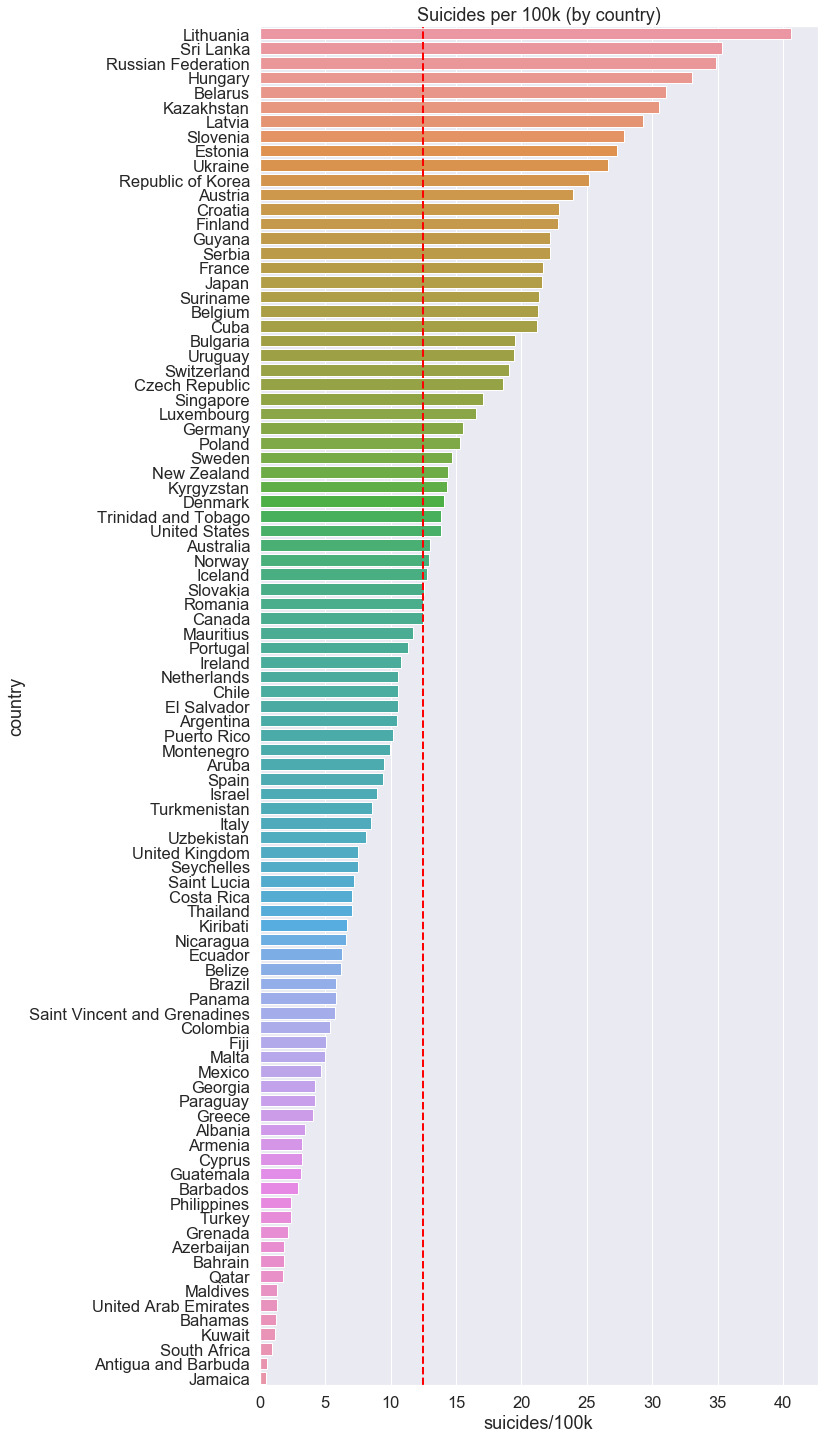

In [22]:
plt.figure(figsize=(10,25))
sns.barplot(x='suicides/100k', y ='country', data=byCountry)
plt.axvline(x = byCountry['suicides/100k'].mean(),color = 'red', ls='--', linewidth=2)
plt.title('Suicides per 100k (by country)')
plt.show()

## 2.2. Suicides by year

In [23]:
byYear = df.groupby('year').mean().reset_index()

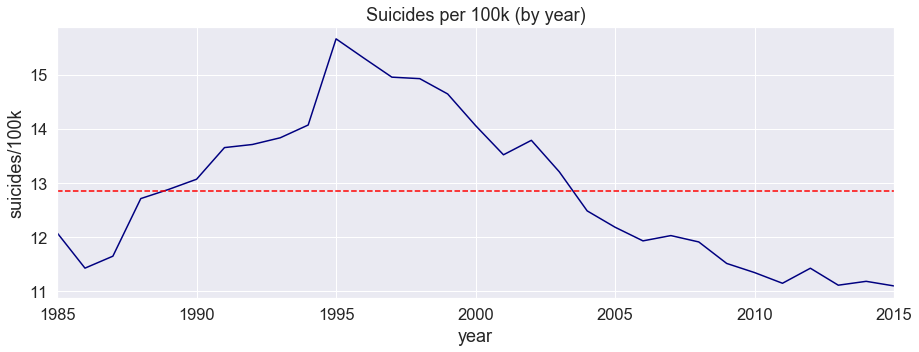

In [24]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year', y='suicides/100k', data=byYear, color='navy')
plt.axhline(byYear['suicides/100k'].mean(), ls='--', color='red')
plt.title('Suicides per 100k (by year)')
plt.xlim(1985,2015)
plt.show()

### Conclusions
1. Lithuania, Sri Lanka, and Russia are the top 3 countries with more suicides per 100k.
2. On the other hand, Jamaica, Antigua and Barbuda, and South Africa are the top 3 countries with less suicides per 100k.
3. The number of suicides per 100k has a decresing trend after the peak in 1995. 
4. From 2004 the number of suicides per 100k is below average.
5. It would be interesting to find the reason why the number of suicides per 100k increased from 1990 to 1995. 

## 2.3. Suicides by sex

In [25]:
bySex     = df.groupby('sex').mean().reset_index()
bySexYear = df.groupby(['sex','year']).mean().reset_index()
bySexAge = df.groupby(['sex','age']).mean().sort_values('suicides/100k', ascending=True).reset_index()
bySexGeneration = df.groupby(['sex','generation']).mean().sort_values('suicides/100k', ascending=True).reset_index()

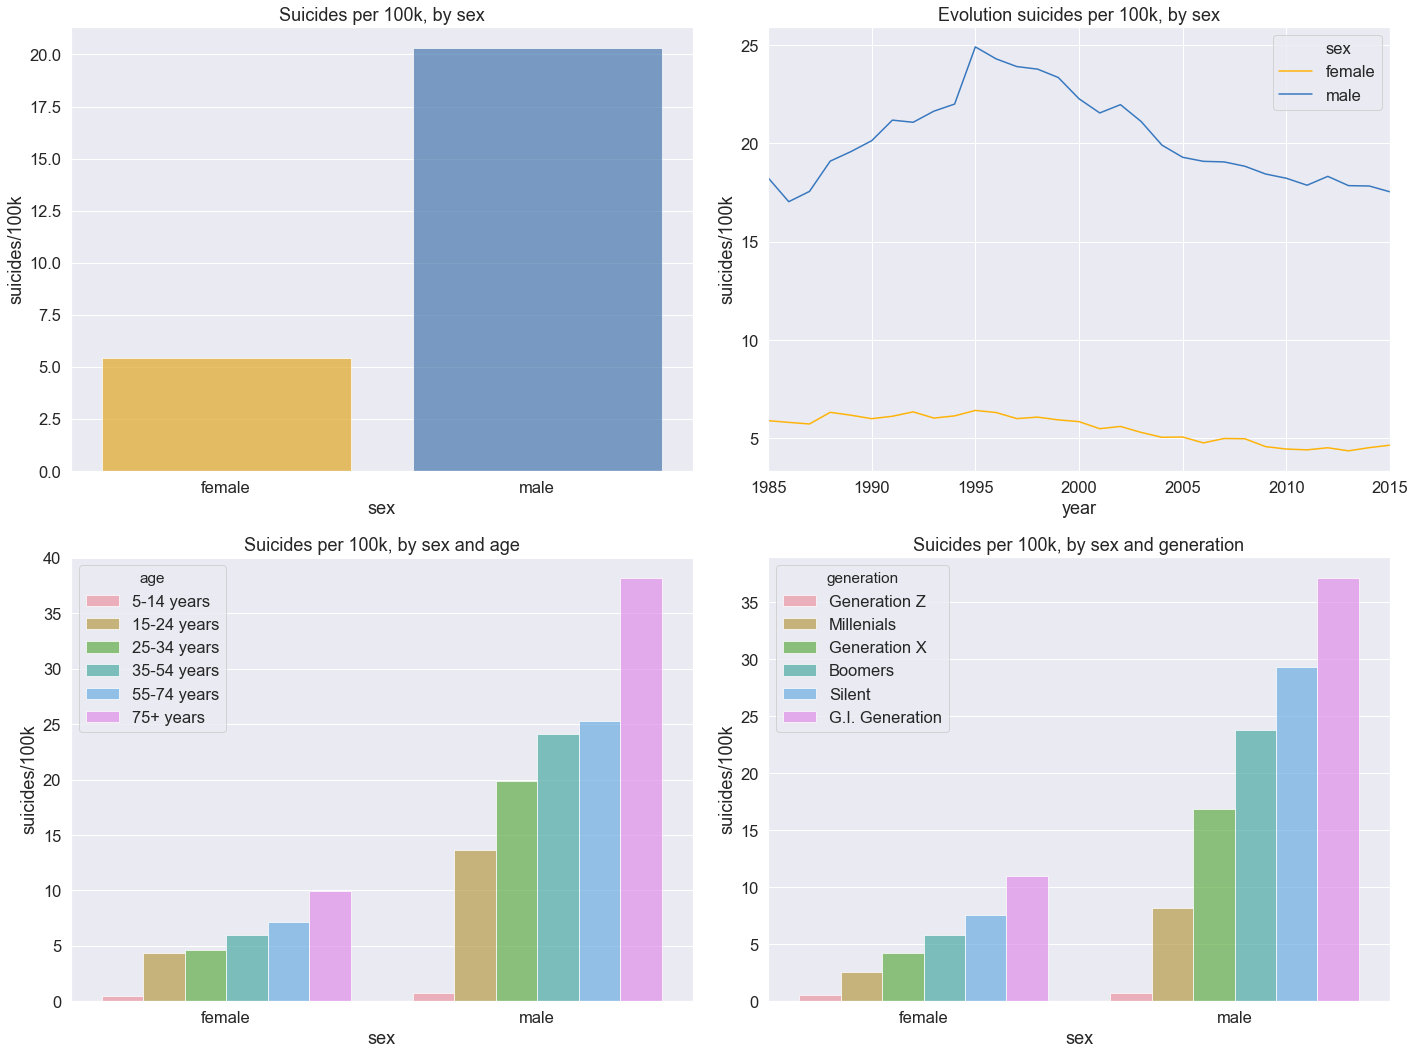

In [26]:
plt.figure(figsize=(20,15))
# By sex
plt.subplot(221)
sns.barplot(x='sex', y='suicides/100k', data=bySex, alpha=alpha)
plt.title('Suicides per 100k, by sex')
# Time veolution by sex
plt.subplot(222)
sns.lineplot(x='year', y='suicides/100k', data=bySexYear, hue='sex')
plt.xlim(1985,2015)
plt.title('Evolution suicides per 100k, by sex')
# By sex and age
plt.subplot(223)
sns.barplot(x='sex', y='suicides/100k', data=bySexAge, hue='age', alpha=alpha)
plt.title('Suicides per 100k, by sex and age')
# By sex and generation
plt.subplot(224)
sns.barplot(x='sex', y='suicides/100k', data=bySexGeneration, hue='generation', alpha=alpha)
plt.title('Suicides per 100k, by sex and generation')

plt.tight_layout()
plt.show()

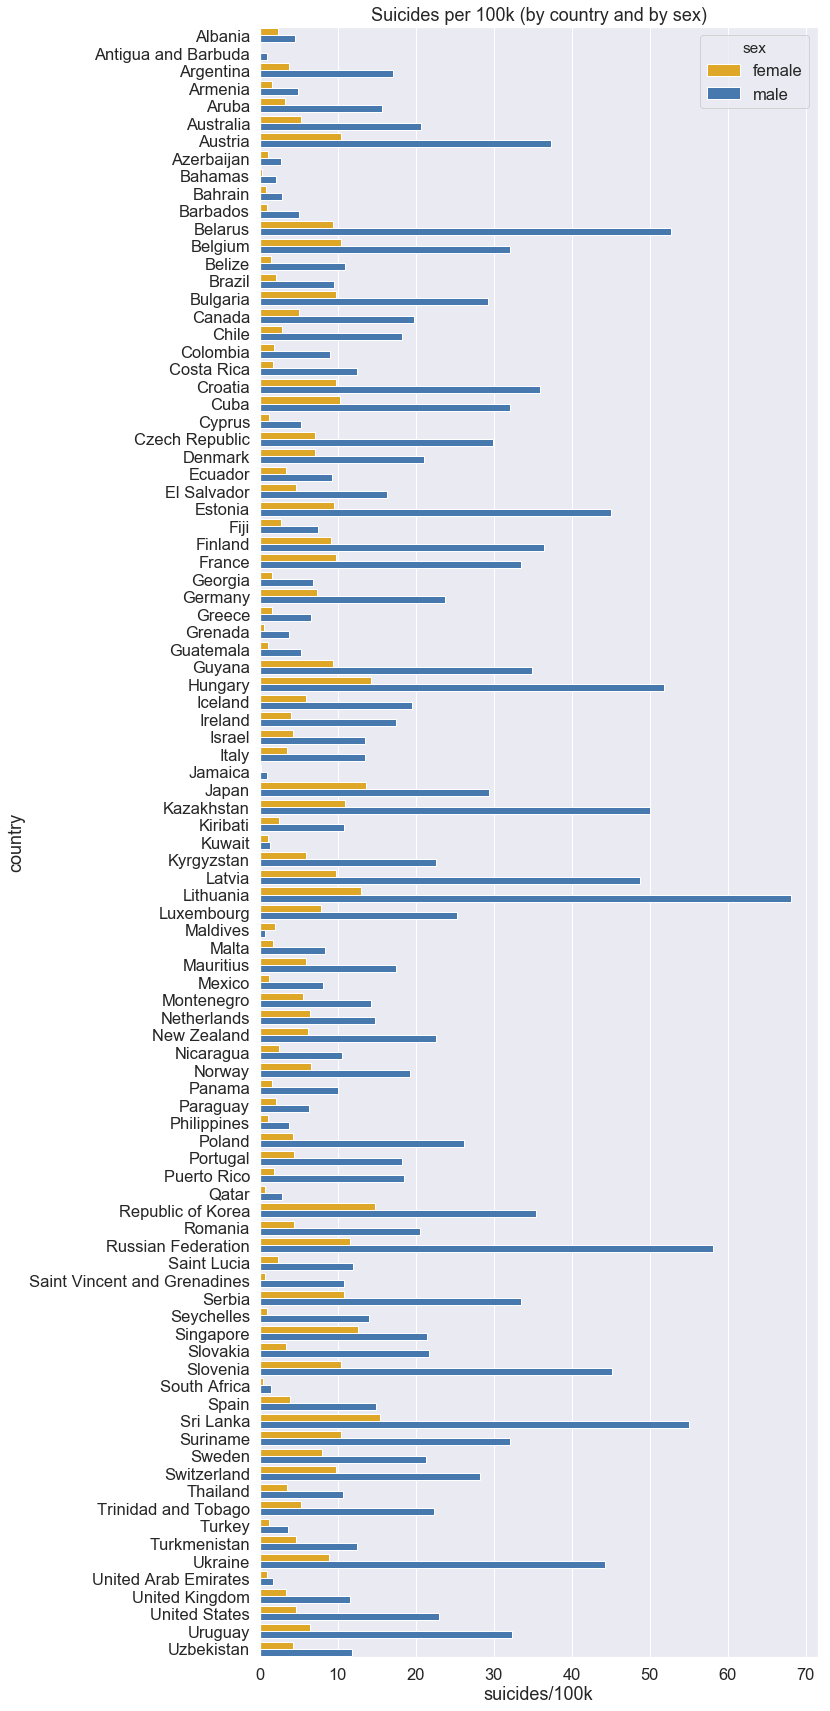

In [27]:
byCountrySex = df.groupby(['country','sex']).mean().reset_index()
byCountrySex.head()
plt.figure(figsize=(10,30))
sns.barplot(y='country', x='suicides/100k', data=byCountrySex, hue='sex')
plt.title('Suicides per 100k (by country and by sex)')
plt.show()

#### Countries in which the number of female suicides is higher than the number male suicides

In [28]:
for country in byCountrySex['country']:
    suicides_female = byCountrySex[(byCountrySex['sex']=='female') & \
                                   (byCountrySex['country']==country)]['suicides/100k']
    suicides_male   = byCountrySex[(byCountrySex['sex']=='male')   \
                                   & (byCountrySex['country']==country)]['suicides/100k']
    if suicides_female.iloc[0] > suicides_male.iloc[0]:
        print(country)

Maldives
Maldives


### Conslusions
1. Crearly men commit more suicide than women. 
2. The number of male suicides per 100k over the yers is higher than the female suicides. 
3. Nevertheless, the suicides per 100k from 1995 have decreased for both men and women. 
4. There is a correlation between the age and the number of suicides per 100k.
5. G.I. and Silent generations have more suicides per 100k than the others. One would be able to think that this figure is confused because some generations are older than others; therefore the number of suicides for the older generations must be higher than the younger ones. Nevertheless, we have observed that the amount of data for G.I. Generation is lower than, for example, Millenials. 
5. Only in one country (Maldives) the number of female suicides per 100k is higher than the number of male suicides pero 100k. 

## 2.4. Suicides by age

In [29]:
byAge     = df.groupby('age').mean().sort_values('suicides/100k', ascending=True).reset_index()
byAgeYear = df.groupby(['age','year']).mean().sort_values('suicides/100k', ascending=True).reset_index()
byAgeSex = df.groupby(['age','sex']).mean().sort_values('suicides/100k', ascending=True).reset_index()
byAgeGen = df.groupby(['age','generation']).mean().sort_values('suicides/100k', ascending=True).reset_index()

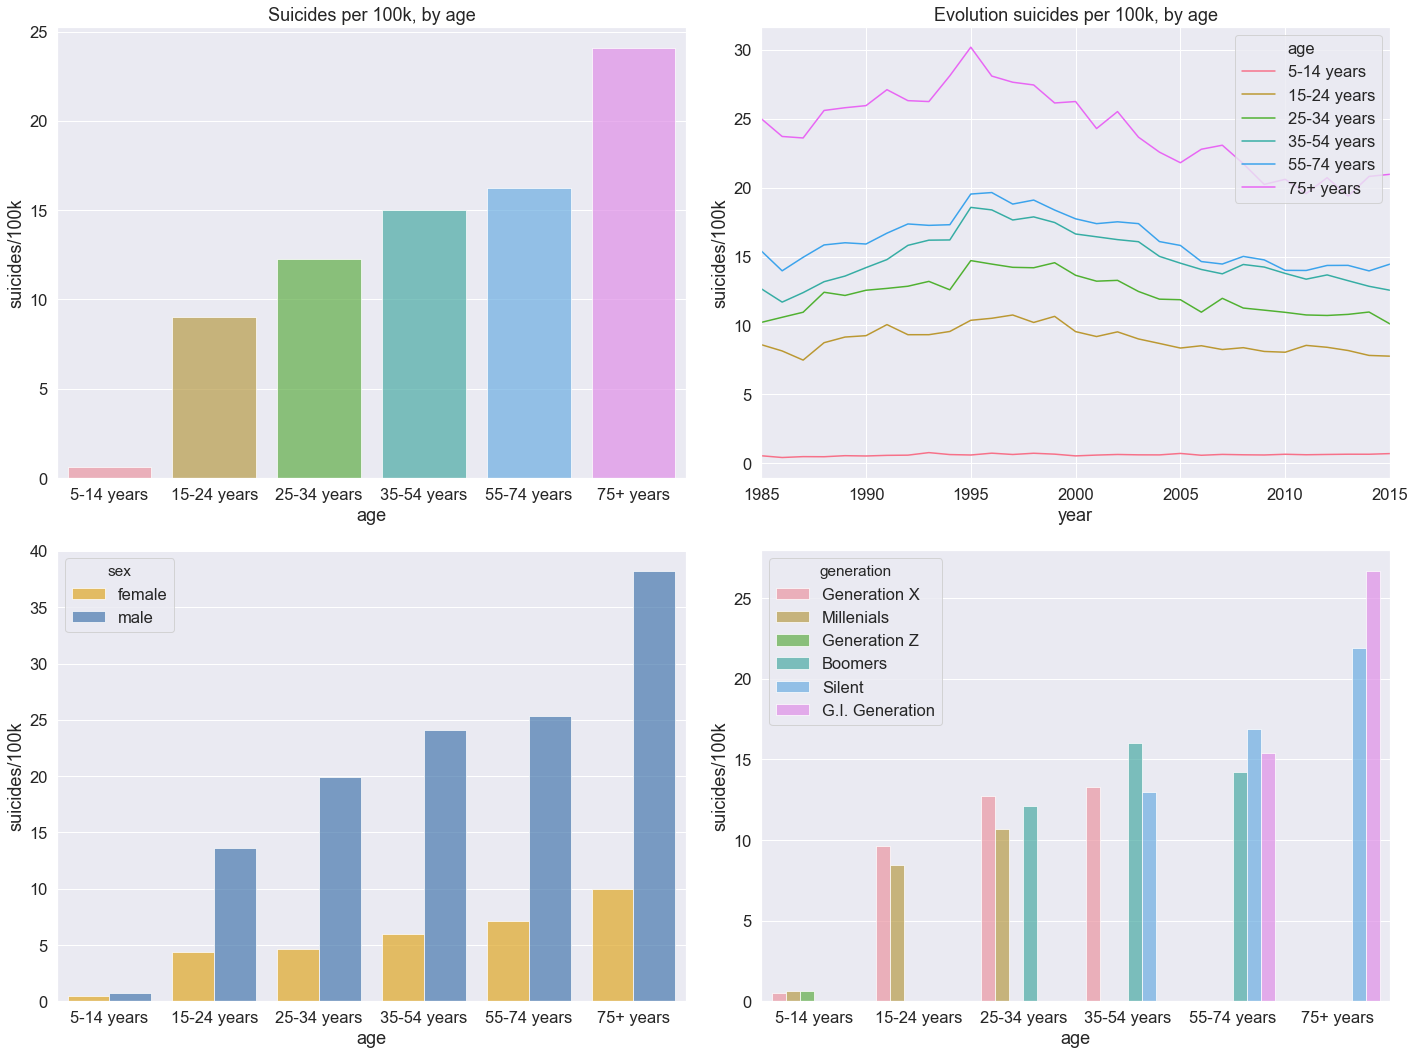

In [30]:
plt.figure(figsize=(20,15))
# By age
plt.subplot(221)
sns.barplot(x='age', y='suicides/100k', data=byAge, alpha=alpha)
plt.title('Suicides per 100k, by age')
# Time evolution by age
plt.subplot(222)
sns.lineplot(x='year', y='suicides/100k', data=byAgeYear, hue='age')
plt.xlim(1985,2015)
plt.title('Evolution suicides per 100k, by age')
# 
plt.subplot(223)
sns.barplot(x='age', y='suicides/100k', data=byAgeSex, hue='sex', alpha=alpha)
plt.subplot(224)
sns.barplot(x='age', y='suicides/100k', data=byAgeGen, hue='generation', alpha=alpha)

plt.tight_layout()
plt.show()

### Conclusions
1. The number of suicides per 100k increases with the age. 
2. The number of suicides per 100k decreases from 1995 to 2015 in all age groups except 5-14 year, which slightly increases.
3. The peak of suicides in 1995 is more striking for people with ages +75. 
4. In all age groups there are more male suicides per 100k than female ones. 

## 2.5. Suicides and GPD

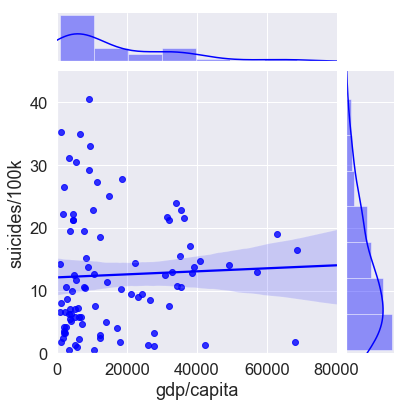

In [31]:
g = sns.jointplot(x="gdp/capita", y="suicides/100k", data=byCountry, kind='regresion', \
              xlim=(-100,80000), ylim=(0,45), color='blue')

### Conclusions: 
1. It seems that there is no correlation between the gdp/capita and the number of suicides per 100k.

# 3. Spanish case

Because I am from Spain I would like to understand if the financial crisis from 2008 to 2014 (https://en.wikipedia.org/wiki/2008–2014_Spanish_financial_crisis) is reflected somehow in the suicides.

In [32]:
spain = df0[df0['country']=='Spain']

In [33]:
spain_byYear = spain.groupby('year').mean().reset_index()
spain_bySexYear = spain.groupby(['sex','year']).mean().reset_index()
spain_byAgeYear = spain.groupby(['age','year']).mean().reset_index()

## 3.1. Suicides per 100k and its relation to the GDP

In the following plots the red line represents the mean of the 'y variable' and the vertical black lines the years 2008 and 2014.

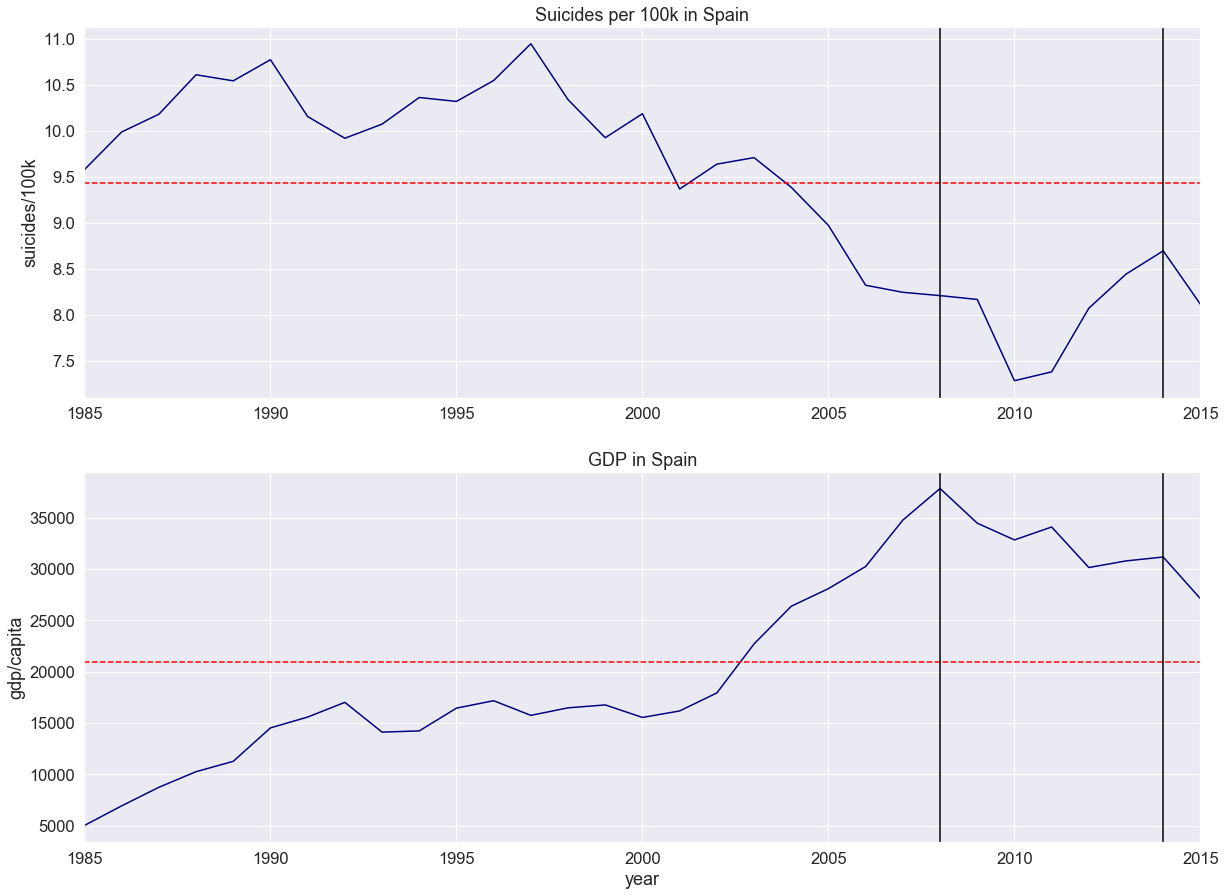

In [34]:
plt.figure(figsize=(20,15))

plt.subplot(211)
sns.lineplot(x='year', y='suicides/100k', data=spain_byYear, color='navy')
plt.axhline(spain_byYear['suicides/100k'].mean(), ls='--', color='red')
plt.axvline(x=2008, ls='-', color='black')
plt.axvline(x=2014, ls='-', color='black')
plt.title('Suicides per 100k in Spain')
plt.xlim(1985,2015)
plt.xlabel('')

plt.subplot(212)
sns.lineplot(x='year', y='gdp/capita', data=spain_byYear, color='navy')
plt.axhline(spain_byYear['gdp/capita'].mean(), ls='--', color='red')
plt.title('GDP in Spain')
plt.xlim(1985,2015)
plt.axvline(x=2008, ls='-', color='black')
plt.axvline(x=2014, ls='-', color='black')

plt.tight_layout
plt.show()

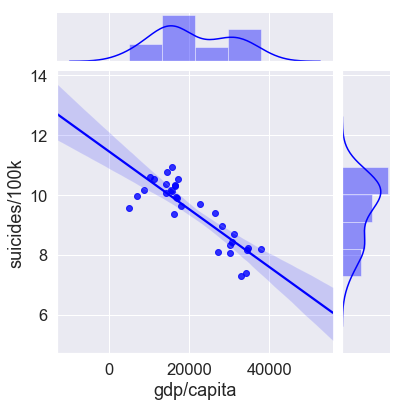

In [35]:
g = sns.jointplot(x="gdp/capita", y="suicides/100k", data=spain_byYear, kind='regresion', color='blue')

## 3.2. Number of suicides per 100k and its relation to age and sex

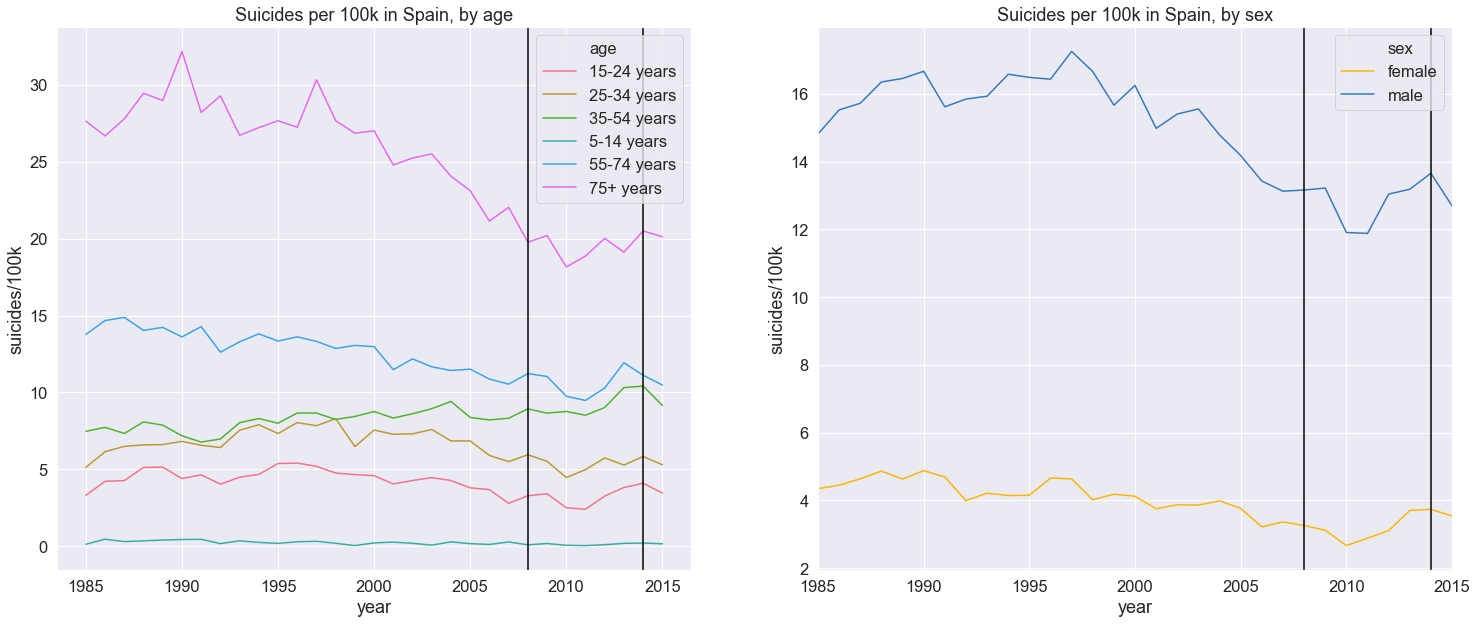

In [36]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.lineplot(x='year', y='suicides/100k', data=spain_byAgeYear, hue='age')
plt.axvline(x=2008, ls='-', color='black')
plt.axvline(x=2014, ls='-', color='black')
plt.title('Suicides per 100k in Spain, by age')

plt.subplot(122)
sns.lineplot(x='year', y='suicides/100k', data=spain_bySexYear, hue='sex')
plt.xlim(1985,2015)
plt.axvline(x=2008, ls='-', color='black')
plt.axvline(x=2014, ls='-', color='black')
plt.legend(loc='upper right')
plt.title('Suicides per 100k in Spain, by sex')

plt.show()

### Conclusions
1. Although the number of suicides per 100k between 2008 and 2014 is below the mean over the years, it seems that there is an increment of the number of suicides from 2010 (two years later after the beginning of the crisis) to 2015. 
2. Clearly the GDP of Spain decreased between 2008 and 2015 due to the crisis. From the joinplot we can figure out that in Spain the GDP is related to the number of suicides (if the GDP increases the number of suicides decreases). Therefore, the decreased of the GDP between 2008 and 2014 could explain such increment in the number of suicides. 
3. It seems that in every age group the decreasing trend in the number of suicides changes after 2008.